## **REGRESSION MODEL FOR SALES PREDICTION**

In [1404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1405]:
# READING AND ANALYSIS THE DATA
train_data=pd.read_csv('/content/train_v9rqX0R.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1406]:
test_data=pd.read_csv('/content/test_AbJTz2l.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1407]:
train_data.shape

(8523, 12)

In [1408]:
test_data.shape

(5681, 11)

In [1409]:
train_data.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

In [1410]:
train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1411]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1412]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1413]:
# MISSING VALUE HANDLING IN COLUMNS-Item_Weight(numerical) AND Outlet_Size(categorical)
train_data.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [1414]:
# replacing the NaN with median in Item_Weight column
train_data.Item_Weight=train_data.Item_Weight.fillna(train_data.Item_Weight.median())
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1415]:
test_data.Item_Weight=test_data.Item_Weight.fillna(test_data.Item_Weight.median())
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1416]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [1417]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1418]:
# categorical column Outlet_Size
train_data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [1419]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1420]:
# REPLACING THE NaN IN CATEGORICAL COLUMN WITH MODE
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

In [1421]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1422]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [1423]:
# DROPPING COLUMNS Item_Identifier, Outlet_Identifier,'Outlet_Establishment_Year' SINCE IT HAS NO ROLE IN PREDICTION
train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


<Axes: >

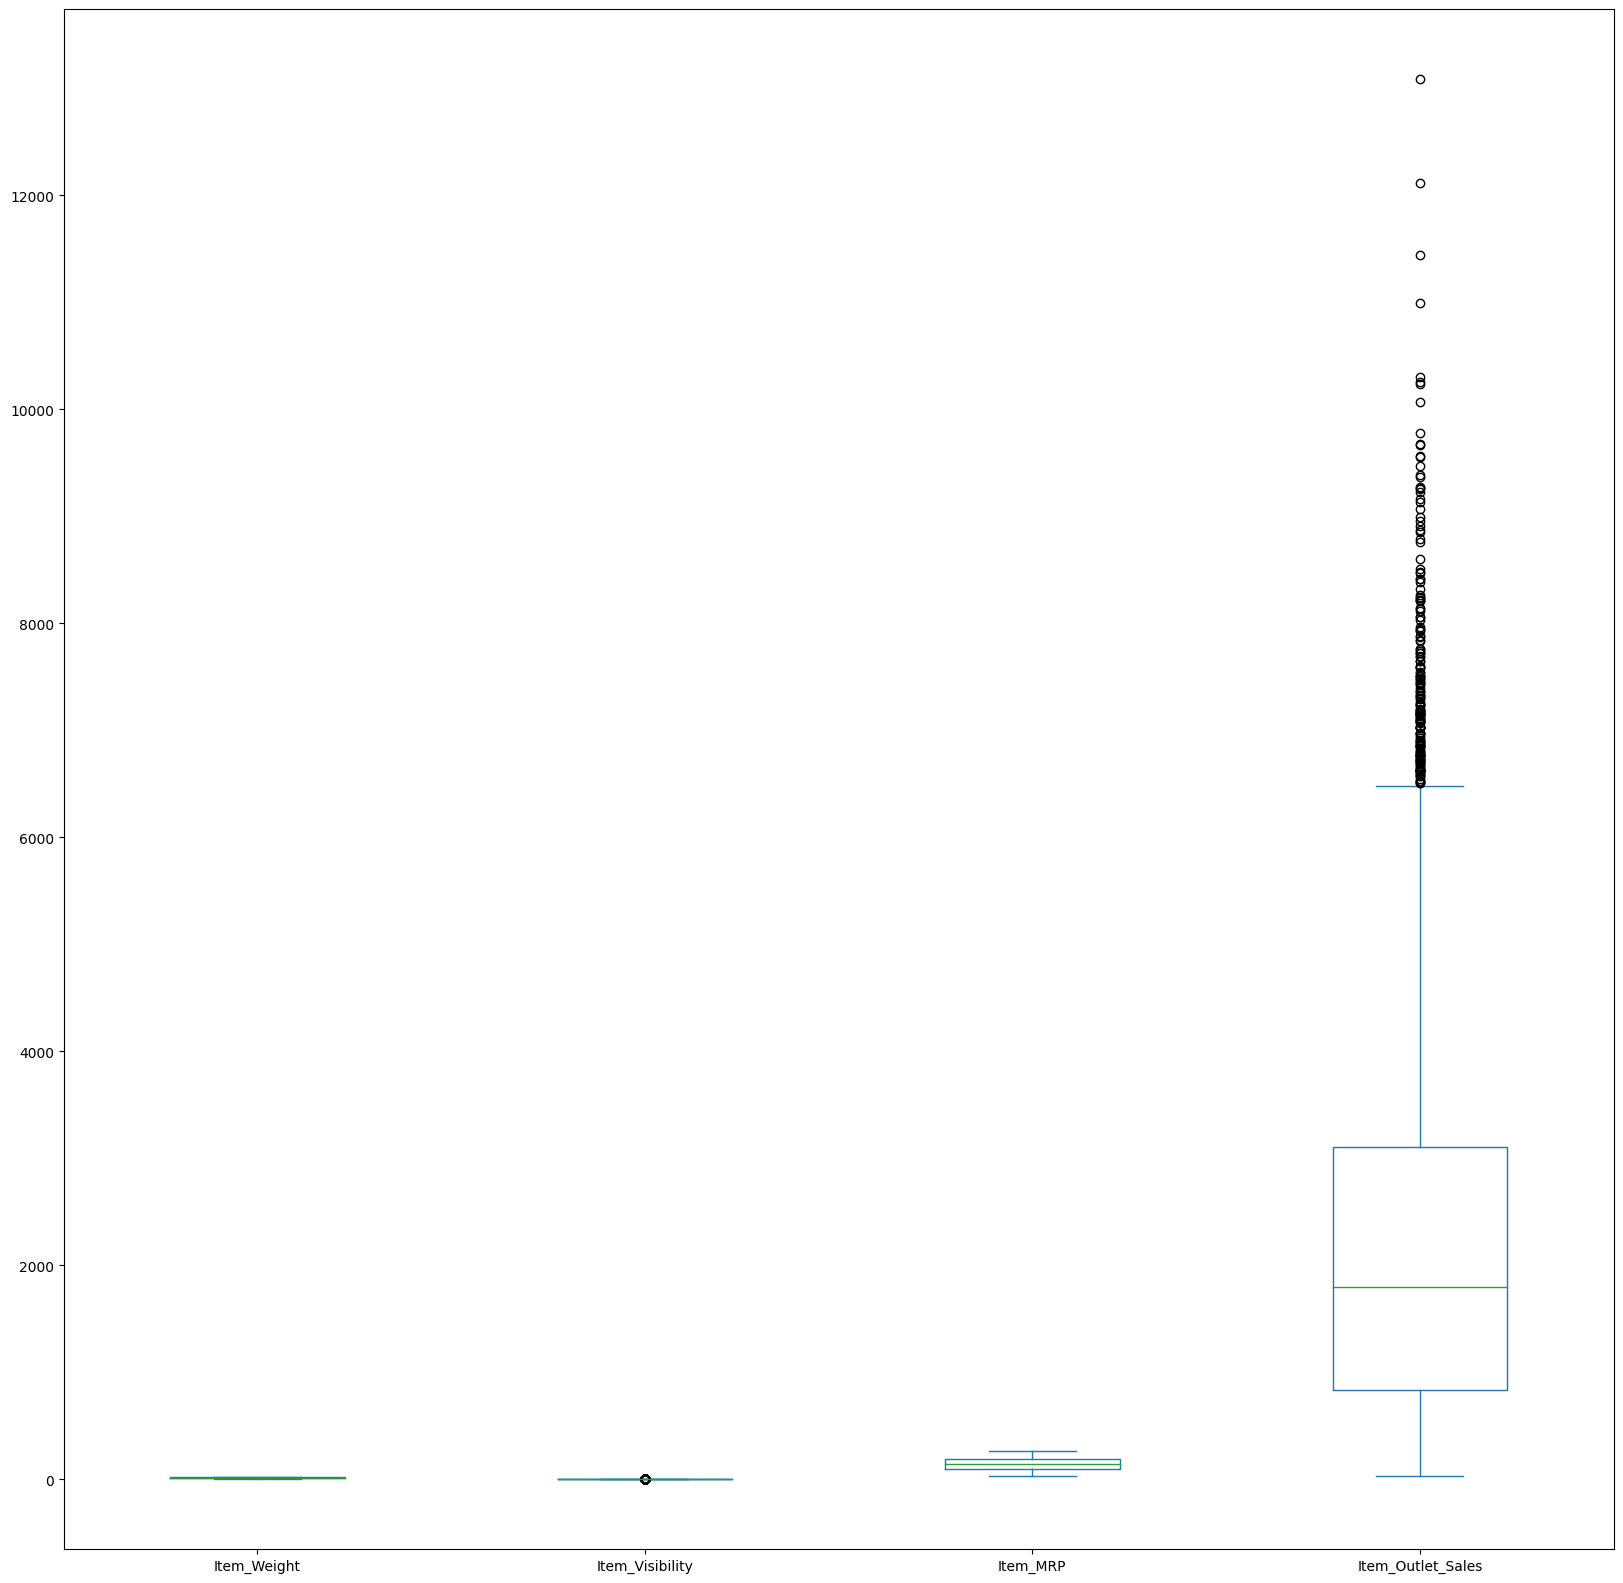

In [1424]:
train_data.plot(kind='box',figsize=(20,20))

outliers are not handled since we cannot change the Item_Outlet_Sales value

In [1425]:
# ENCODING
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [1426]:
test_data.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [1427]:
# Low Fat,low fat,LF ARE SAME. ALSO, Regular AND reg ARE SAME,SO REPLACING
train_data.loc[train_data['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
train_data.loc[train_data['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
train_data.loc[train_data['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [1428]:
test_data.loc[test_data['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
test_data.loc[test_data['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
test_data.loc[test_data['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [1429]:
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [1430]:
train_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [1431]:
train_data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [1432]:
train_data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [1433]:
train_data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [1434]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [1435]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Item_Fat_Content']= le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type']= le.fit_transform(train_data['Item_Type'])
train_data['Outlet_Size']= le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']= le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type']= le.fit_transform(train_data['Outlet_Type'])

In [1436]:
test_data['Item_Fat_Content']= le.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type']= le.fit_transform(test_data['Item_Type'])
test_data['Outlet_Size']= le.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']= le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type']= le.fit_transform(test_data['Outlet_Type'])

In [1437]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [1438]:
train_data.dtypes

Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
Item_Outlet_Sales       float64
dtype: object

In [1439]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


In [1440]:
train_data.corr()#FOR FINDING THE CORRELATION

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021092,-0.014168,0.028038,0.024951,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.021092,1.000000,0.047314,-0.139434,0.006063,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.014168,0.047314,1.000000,-0.035249,-0.001315,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.139434,-0.035249,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024951,0.006063,-0.001315,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574
Outlet_Size,-0.010536,-0.000622,0.069309,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.001958,-0.001598,-0.028099,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,0.002199,-0.173468,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.009693,0.018719,-0.128625,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000


<Axes: >

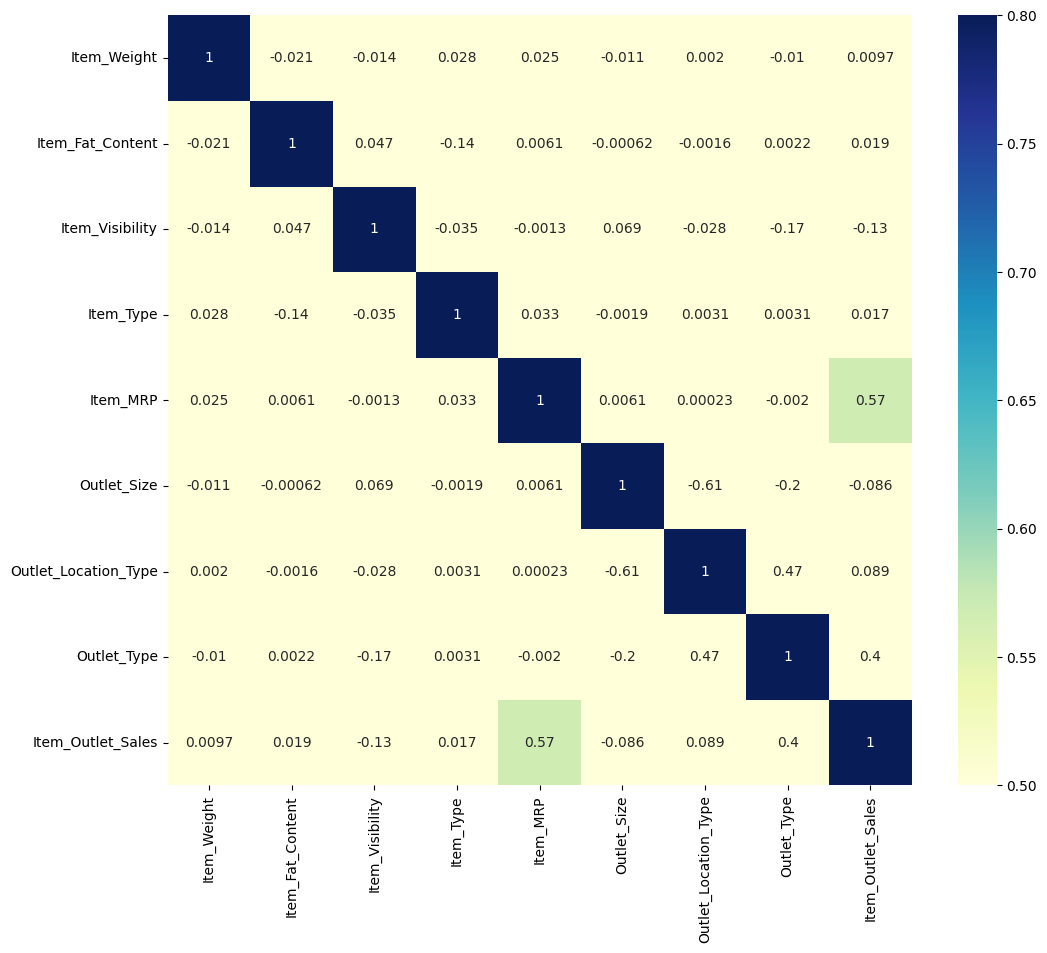

In [1441]:
# plotting the heatmap
corrmatrix=train_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,vmin=0.5,vmax=0.8,cmap='YlGnBu')

there is no features with zero correlation

In [1442]:
#seperating the target column
x = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

In [1443]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [1444]:
# DROPPING COLUMNS Item_Identifier, Outlet_Identifier,'Outlet_Establishment_Year' FROM TESTDATA
test_data=test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [1445]:
#splitting the data to train data and test data for modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **MODELLING**

In [1446]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [1447]:
y_pred_lr=lr.predict(x_test)

In [1448]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred_lr)
r2lr=r2_score(y_test,y_pred_lr)
print(mse,r2lr)

1293502.0349227027 0.5240926120526304


In [1449]:
# RANDOM FOREST REGRESSION AFTER TUNING n_estimators=125
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=125,random_state=42)
rfr.fit(x_train,y_train)
y_pred_rf=rfr.predict(x_test)
r2rf=r2_score(y_test,y_pred_rf)
print(r2rf)

0.5595847046974101


In [1450]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
print(mse_rf)
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

1197035.5895126038
1094.0912162670002


In [1451]:
# DECISION TREE REGRESSION AFTER TUNING max_depth=5
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5,random_state=42)
dtr.fit(x_train,y_train)
y_pred_dtr=dtr.predict(x_test)
r2dtr=r2_score(y_test,y_pred_dtr)
print(r2dtr)

0.6113487876684925


In [1452]:
mse_dtr=mean_squared_error(y_test,y_pred_dtr)
print(mse_dtr)
print(np.sqrt(mean_squared_error(y_test,y_pred_dtr)))

1056342.3614713373
1027.7851728213136


In [1453]:
# ADABOOST REGRESSION AFTER TUNING n_estimators=10
from sklearn.ensemble import AdaBoostRegressor
ada_r=AdaBoostRegressor(n_estimators=10,random_state=42)
ada_r.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=10, random_state=42)

In [1454]:
y_pred_ada=ada_r.predict(x_test)
r2ada=r2_score(y_test,y_pred_ada)
print(r2ada)

0.5431905972906873


In [1455]:
# GRADIENT BOOSTING after tuning n_estimators=40,max_depth=3
from sklearn.ensemble import GradientBoostingRegressor
grad_R=GradientBoostingRegressor(n_estimators=40,max_depth=3,random_state=42)
grad_R.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=40, random_state=42)

In [1456]:
y_pred_grad=grad_R.predict(x_test)
r2grad=r2_score(y_test,y_pred_grad)
print(r2grad)

0.6126988102120721


In [1457]:
# XGBOOST REGRESSION after tuning n_estimators=10,max_depth=3
import xgboost as xgb
xgb_r=xgb.XGBRegressor(n_estimators=10,max_depth=3,random_state=42)
xgb_r.fit(x_train,y_train)
y_pred_xgb=xgb_r.predict(x_test)

In [1458]:
r2xgb=r2_score(y_test,y_pred_xgb)
print(r2xgb)

0.6105246039597368


UPLOADING THE SUBMISSION FILE

In [1459]:
submission=pd.read_csv('/content/sample_submission_8RXa3c6.csv')
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [1460]:
test_data.shape

(5681, 8)

## **Testing the regression models with test data and repalcing the target column with the prediction values. The submission file is then saved as .csv for uploading**

LINEAR REGRESSION

In [1461]:
y_pred_lrtest=lr.predict(test_data)
y_pred_lrtest

array([2059.31545931, 1352.79692581, 2172.37726345, ..., 1716.3732177 ,
       3391.65184717, 1121.81761268])

In [1462]:
submission['Item_Outlet_Sales'] = y_pred_lrtest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2059.315459
1,FDW14,OUT017,1352.796926
2,NCN55,OUT010,2172.377263
3,FDQ58,OUT017,2387.348613
4,FDY38,OUT027,5061.351711


In [1463]:
submission.to_csv('submissionlinear.csv',index=False)

RANDOM FOREST

In [1464]:
y_pred_rftest=rfr.predict(test_data)
y_pred_rftest

array([1699.5956496, 1130.2407744,  577.6587328, ..., 1809.484608 ,
       4488.2057376, 1526.0455584])

In [1465]:
submission['Item_Outlet_Sales'] = y_pred_rftest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1699.595650
1,FDW14,OUT017,1130.240774
2,NCN55,OUT010,577.658733
3,FDQ58,OUT017,2293.244235
4,FDY38,OUT027,6295.437278


In [1466]:
submission.to_csv('submissionrf.csv',index=False)

DECISION TREE

In [1467]:
y_pred_dtrtest=dtr.predict(test_data)

In [1468]:
submission['Item_Outlet_Sales'] = y_pred_dtrtest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1507.076812
1,FDW14,OUT017,1507.076812
2,NCN55,OUT010,562.158867
3,FDQ58,OUT017,2499.482717
4,FDY38,OUT027,6458.303803


In [1469]:
submission.to_csv('submissiondtr.csv',index=False)

ADABOOST REGRESSION

In [1470]:
y_pred_adatest=ada_r.predict(test_data)

In [1471]:
submission['Item_Outlet_Sales'] = y_pred_adatest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1922.828707
1,FDW14,OUT017,1191.816219
2,NCN55,OUT010,569.656037
3,FDQ58,OUT017,3299.339982
4,FDY38,OUT027,5444.632878


In [1472]:
submission.to_csv('submissionada.csv',index=False)

GRADIENT BOOSTING

In [1473]:
y_pred_gradtest=grad_R.predict(test_data)

In [1474]:
submission['Item_Outlet_Sales'] = y_pred_gradtest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1652.530724
1,FDW14,OUT017,1418.530734
2,NCN55,OUT010,693.211283
3,FDQ58,OUT017,2465.947910
4,FDY38,OUT027,6029.664200


In [1475]:
submission.to_csv('submissiongrad.csv',index=False)

XGBOOSTING

In [1476]:
y_pred_xgbtest=xgb_r.predict(test_data)

In [1477]:
submission['Item_Outlet_Sales'] = y_pred_xgbtest
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1616.953735
1,FDW14,OUT017,1325.586548
2,NCN55,OUT010,680.788635
3,FDQ58,OUT017,2396.742188
4,FDY38,OUT027,6030.213379


In [1478]:
submission.to_csv('submissionxgb.csv',index=False)